<a href="https://colab.research.google.com/github/LetsTrie/image-processing-training/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing with OpenCV

In [160]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

--2024-05-17 05:17:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K   564KB/s    in 0.8s    

2024-05-17 05:17:17 (564 KB/s) - ‘lenna.png’ saved [473831/473831]

--2024-05-17 05:17:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-course

In [161]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [162]:
cwd = os.getcwd()
print(f"current working directory: {cwd}")

image_path = os.path.join(cwd, "lenna.png")
print(f"Image path: {image_path}")

current working directory: /content
Image path: /content/lenna.png


In [163]:
# If the image is in the same directory, you can import by its name instead of its path.
# image = cv2.imread(my_image)

image = cv2.imread(image_path)

print(f"Image type: {type(image)}")
print(f"Image shape: {image.shape}")

# Each pixel could take on 256 possible values as intensity, ranging from 0 to 255, with 0 being the lowest intensity and 255 being the highest.
print(f"Maximum intensity values of the image: {image.max()}");
print(f"Minimum intensity values of the image: {image.min()}");

Image type: <class 'numpy.ndarray'>
Image shape: (512, 512, 3)
Maximum intensity values of the image: 255
Minimum intensity values of the image: 3


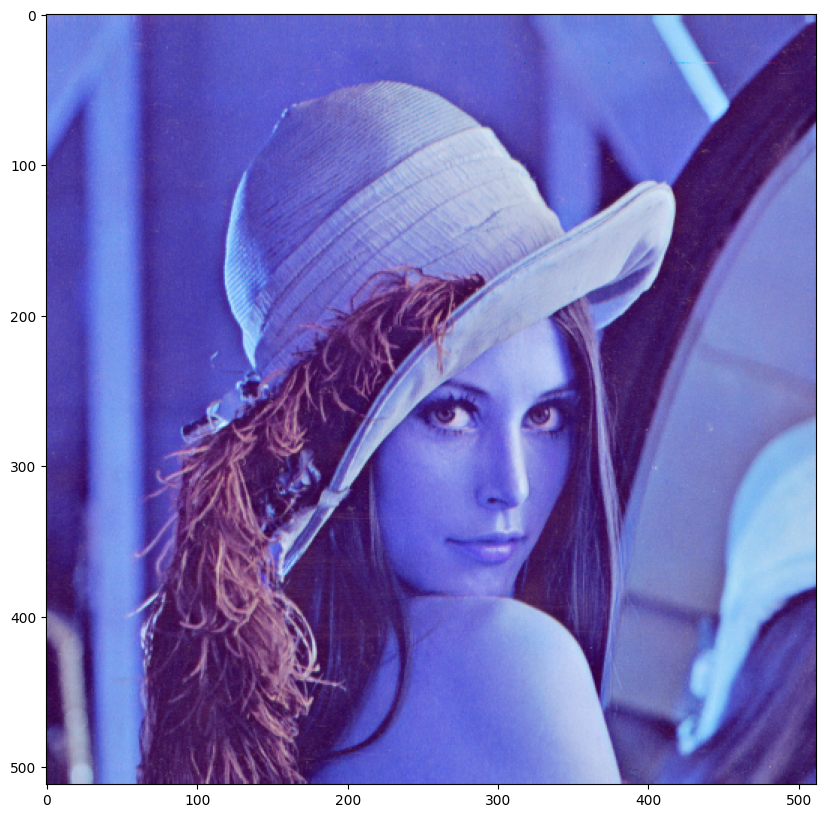

In [164]:
#  Plotting an Image with default BGR Channel
BGR_channel_image = image

plt.figure(figsize=(10,10))
plt.imshow(BGR_channel_image)
plt.show()

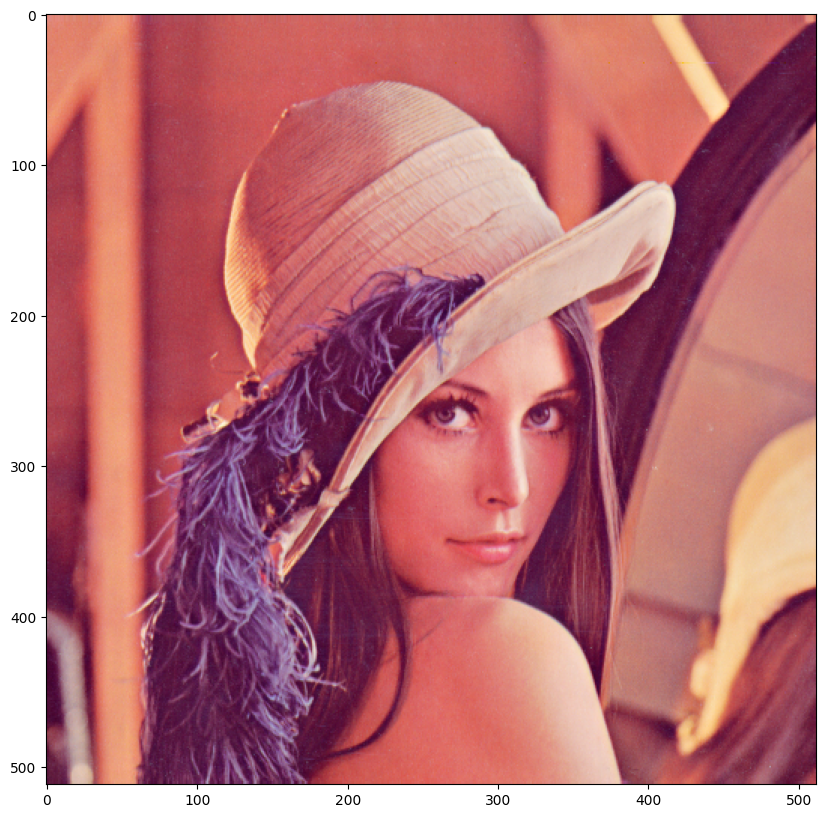

In [165]:
#  Plotting an Image by converting to RGB Channel
RGB_channel_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(RGB_channel_image)
plt.show()

In [166]:
# Save in JPG Format
cv2.imwrite("lenna_in_jpg.jpg", image)

True

In [167]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(f"Shape of a gray image: {gray_image.shape} - no RGB channels.")
cv2.imwrite('lenna_gray_in_jpg.jpg', gray_image)

Shape of a gray image: (512, 512) - no RGB channels.


True

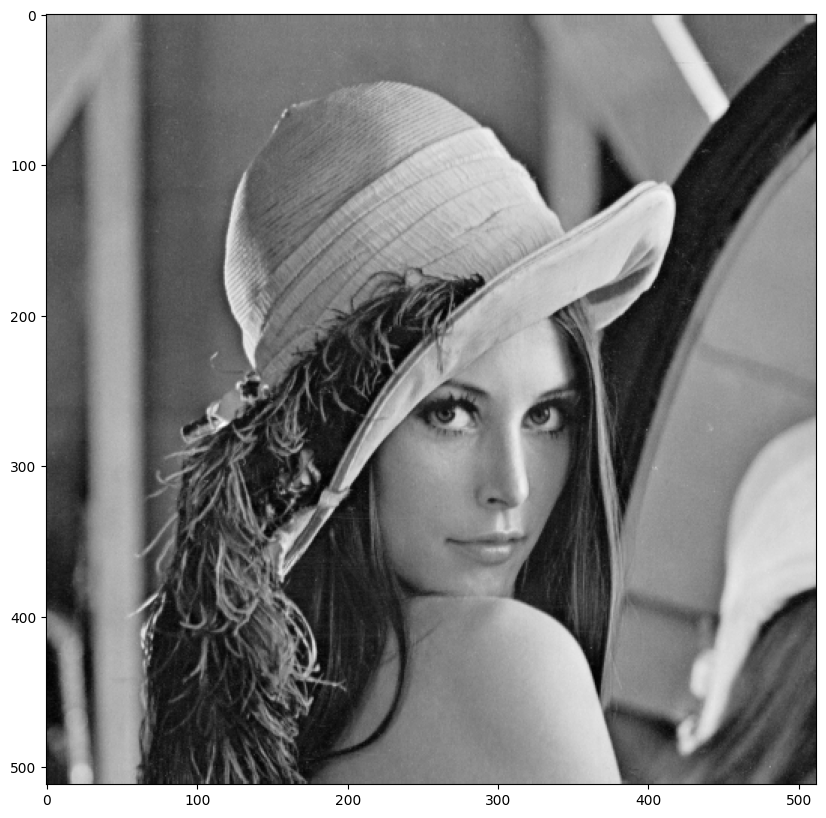

In [168]:
plt.figure(figsize=(10, 10))
plt.imshow(gray_image, cmap='gray')
plt.show()

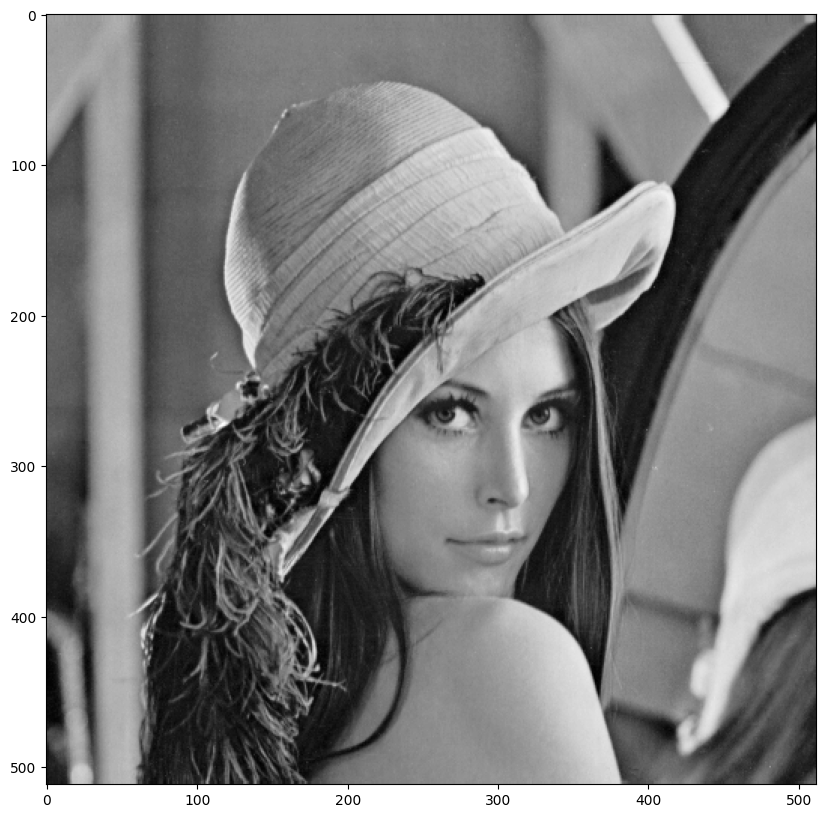

In [169]:
import_gray_image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(import_gray_image,cmap='gray')
plt.show()

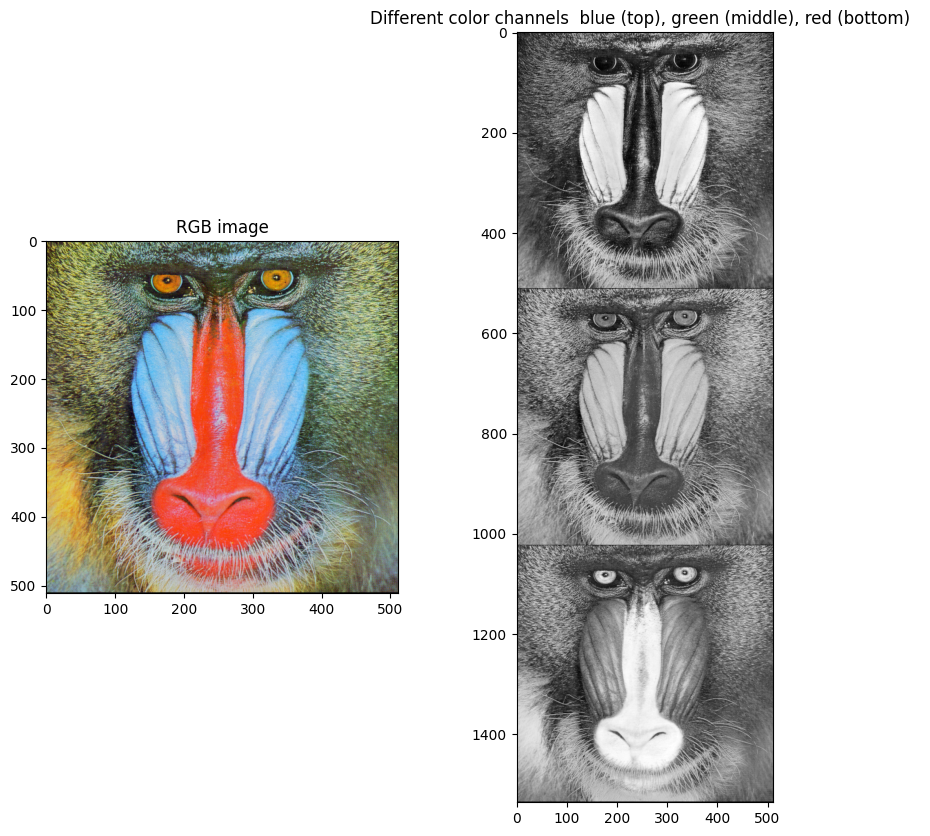

In [170]:
baboon=cv2.imread('baboon.png')
RGB_baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(RGB_baboon)
plt.title("RGB image")

blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]
BGR_SPLIT_IMAGE = cv2.vconcat([blue, green, red])

plt.subplot(122)
plt.imshow(BGR_SPLIT_IMAGE,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

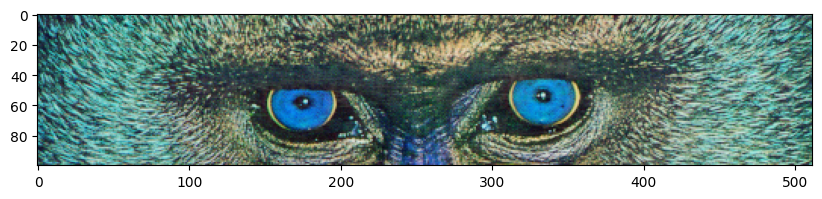

In [171]:
# Return the first 256 rows corresponding to the top half of the image

plt.figure(figsize=(10,10))
plt.imshow(baboon[0:100,:,:])
plt.show()

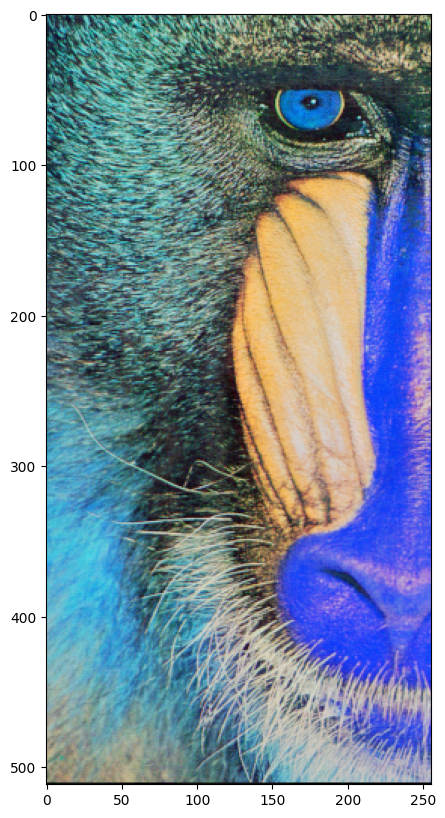

In [172]:
# Return the first 256 columns corresponding to the left half of the image

plt.figure(figsize=(10,10))
plt.imshow(baboon[:,0:256,:])
plt.show()

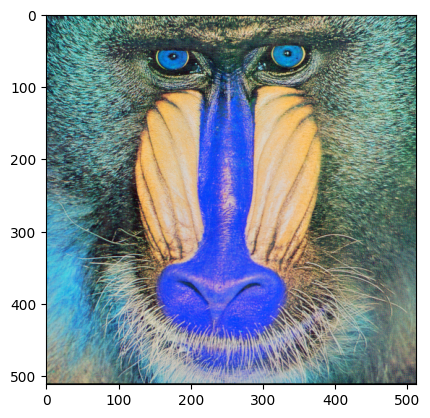

In [173]:
new_baboon = baboon.copy()
plt.imshow(new_baboon)
plt.show()

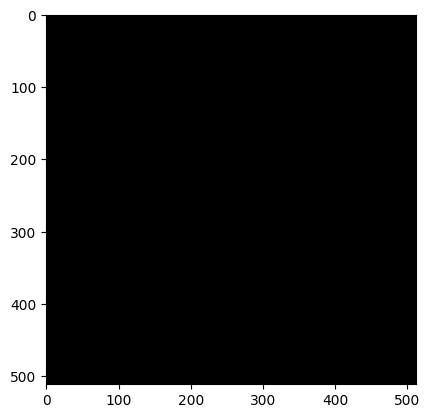

In [174]:
blank_baboon = new_baboon
new_baboon[:,:,:] = 0
plt.imshow(blank_baboon)
plt.show() # If we do not apply the method `copy()`, the variable will point to the same location in memory.

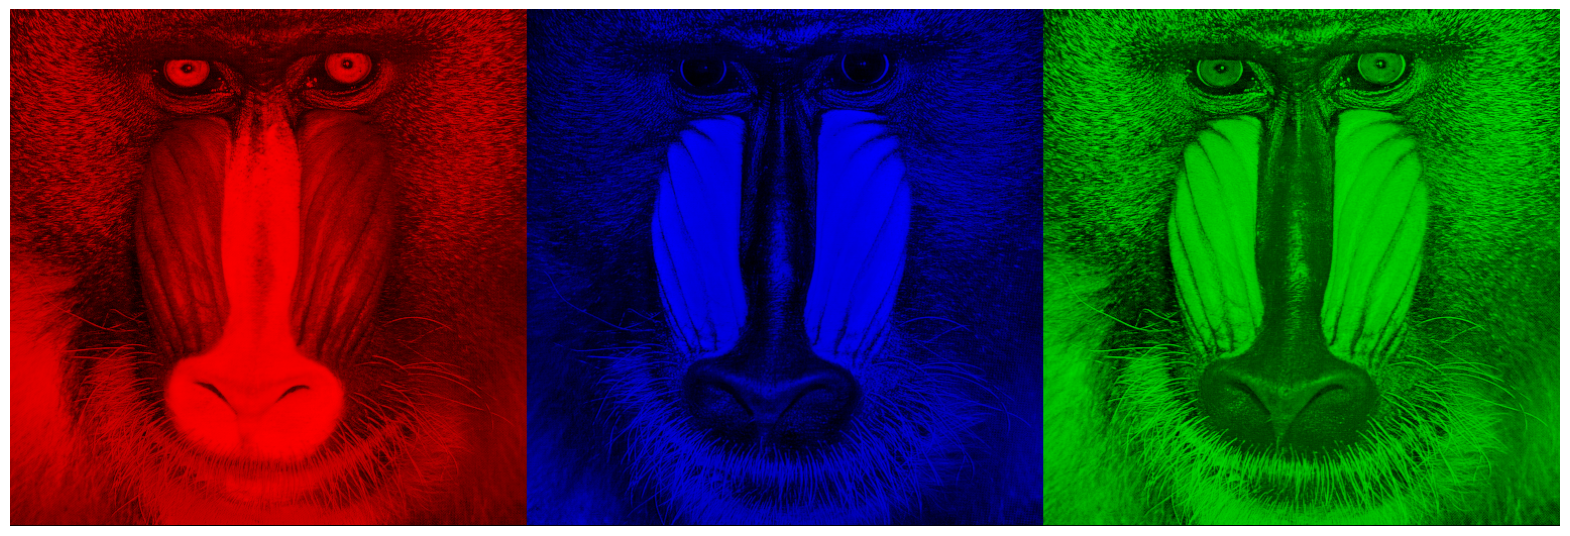

In [175]:
# Create the red, blue, and green channel images
baboon_red = baboon.copy()
baboon_red[:, :, 0] = 0
baboon_red[:, :, 1] = 0

baboon_blue = baboon.copy()
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0

baboon_green = baboon.copy()
baboon_green[:, :, 0] = 0
baboon_green[:, :, 2] = 0

# Concatenate the images horizontally
concatenated_image = np.hstack((baboon_red, baboon_blue, baboon_green))

# Convert BGR to RGB for correct color display in Matplotlib
concatenated_image_rgb = cv2.cvtColor(concatenated_image, cv2.COLOR_BGR2RGB)

# Display the concatenated image
plt.figure(figsize=(20, 10))  # Adjust the figsize to fit all images nicely
plt.imshow(concatenated_image_rgb)
plt.axis('off')  # Hide the axis
plt.show()